In [1]:
import numpy as np
import cv2
import pickle
import pandas as pd
from keras_preprocessing.image import ImageDataGenerator
import os

In [2]:
x=pickle.load(open('C:\\Users\\Ayanabha\\Capstone\\Pickles\\x_nus_I.pkl','rb'))
y=pickle.load(open('C:\\Users\\Ayanabha\\Capstone\\Pickles\\y_nus_I.pkl','rb'))

In [3]:
data={'id':x,'sign':y}
df=pd.DataFrame(data)

In [5]:
df.to_csv('NUS_I.csv')

In [6]:
test_indices=[21,22,23,45,46,47,69,70,71,93,94,95,117,118,119,142,143,166,167,190,191,214,215,238,239]
ind=df.index.isin(test_indices)
df1=df[~ind]
df2=df[ind]

In [32]:
#Image augmentation on train data
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_dataframe(dataframe=df1,
                                        directory=None,
                                        x_col="id", y_col="sign",
                                        batch_size=5, seed=42,
                                        class_mode="categorical",
                                        target_size=(120,120))

Found 215 validated image filenames belonging to 10 classes.


In [33]:
#Image augmentation on test data
test_datagen = ImageDataGenerator(rescale = 1./255)
testing_set = test_datagen.flow_from_dataframe(dataframe=df2,
                                        directory=None,
                                        x_col="id", y_col="sign",
                                        batch_size=5, seed=42,
                                        class_mode="categorical",
                                        target_size=(120,120))

Found 25 validated image filenames belonging to 10 classes.


In [34]:
import tensorflow as tf

In [35]:
init=tf.keras.initializers.he_uniform(seed=5)

In [39]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, kernel_initializer=init,
                               activation='relu', input_shape=[120, 120, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, kernel_initializer=init,
                               activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, kernel_initializer=init,
                               activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=32, kernel_initializer=init,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [40]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [41]:
history=cnn.fit(x = training_set, validation_data = testing_set, epochs = 200)

Epoch 1/200
43/43 [==============================] - 2s 28ms/step - loss: 2.4062 - accuracy: 0.1116 - val_loss: 2.3118 - val_accuracy: 0.0800
Epoch 2/200
43/43 [==============================] - 1s 23ms/step - loss: 2.3079 - accuracy: 0.0837 - val_loss: 2.3007 - val_accuracy: 0.2400
Epoch 3/200
43/43 [==============================] - 1s 23ms/step - loss: 2.3381 - accuracy: 0.1302 - val_loss: 2.3034 - val_accuracy: 0.0800
Epoch 4/200
43/43 [==============================] - 1s 24ms/step - loss: 2.3074 - accuracy: 0.1395 - val_loss: 2.2966 - val_accuracy: 0.1600
Epoch 5/200
43/43 [==============================] - 1s 24ms/step - loss: 2.2948 - accuracy: 0.2047 - val_loss: 2.2674 - val_accuracy: 0.1200
Epoch 6/200
43/43 [==============================] - 1s 23ms/step - loss: 2.2545 - accuracy: 0.1581 - val_loss: 2.2086 - val_accuracy: 0.1200
Epoch 7/200
43/43 [==============================] - 1s 24ms/step - loss: 2.1486 - accuracy: 0.2605 - val_loss: 2.2735 - val_accuracy: 0.2000
Epoch 

43/43 [==============================] - 1s 23ms/step - loss: 0.0320 - accuracy: 0.9860 - val_loss: 1.2632 - val_accuracy: 0.7600
Epoch 116/200
43/43 [==============================] - 1s 25ms/step - loss: 0.0243 - accuracy: 0.9953 - val_loss: 1.2197 - val_accuracy: 0.8000
Epoch 117/200
43/43 [==============================] - 1s 22ms/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 1.5403 - val_accuracy: 0.8400
Epoch 118/200
43/43 [==============================] - 1s 21ms/step - loss: 0.0138 - accuracy: 0.9907 - val_loss: 1.5794 - val_accuracy: 0.8000
Epoch 119/200
43/43 [==============================] - 1s 23ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 1.2747 - val_accuracy: 0.8400
Epoch 120/200
43/43 [==============================] - 1s 24ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 1.1514 - val_accuracy: 0.8400
Epoch 121/200
43/43 [==============================] - 1s 23ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 1.1829 - val_accuracy: 0.8400
Epoch 

Epoch 172/200
43/43 [==============================] - 1s 23ms/step - loss: 0.0641 - accuracy: 0.9721 - val_loss: 1.0449 - val_accuracy: 0.7600
Epoch 173/200
43/43 [==============================] - 1s 23ms/step - loss: 0.0253 - accuracy: 0.9907 - val_loss: 1.2728 - val_accuracy: 0.7600
Epoch 174/200
43/43 [==============================] - 1s 23ms/step - loss: 0.0242 - accuracy: 0.9907 - val_loss: 2.0060 - val_accuracy: 0.7200
Epoch 175/200
43/43 [==============================] - 1s 21ms/step - loss: 0.0189 - accuracy: 0.9953 - val_loss: 1.6697 - val_accuracy: 0.6800
Epoch 176/200
43/43 [==============================] - 1s 21ms/step - loss: 0.0197 - accuracy: 0.9953 - val_loss: 1.8189 - val_accuracy: 0.7600
Epoch 177/200
43/43 [==============================] - 1s 22ms/step - loss: 0.0142 - accuracy: 0.9953 - val_loss: 1.6314 - val_accuracy: 0.7600
Epoch 178/200
43/43 [==============================] - 1s 24ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 1.6931 - val_accuracy:

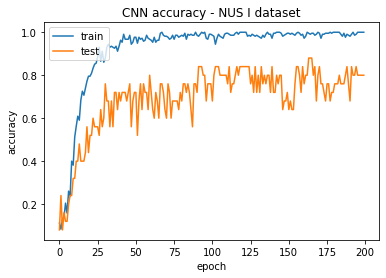

In [42]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN accuracy - NUS I dataset')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

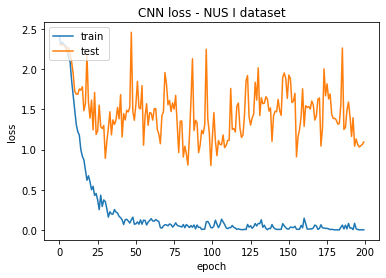

In [43]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN loss - NUS I dataset')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()